In [58]:
####total = [len(x) for x in thing]
#Purpose:
#    Invest in the best series C company and earn high returns.
#Dissecting purpose:
#    Invest:
#        There are previous investors
#        I am current investor
#        There will be future investors
#        Amount invested is in the same range
#    Best:
#        Best growth between rounds and long term
#        Predicting how much valuation will grow between rounds
#        Predicting if the COs can keep up to their valuation
#        Does industry make a difference?
#    Series C:
#        Post A
#        Pre E
#        Compute best intra-round diff to lead to highest valuation


#The financial model has the following fields:
#	
#	- instant: record index
#	- dteday : date
#	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
#	- yr : year (0: 2011, 1:2012)
#	- mnth : month ( 1 to 12)
#	- hr : hour (0 to 23)
#	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
#	- weekday : day of the week
#	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#	+ weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
#	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
#	- hum: Normalized humidity. The values are divided to 100 (max)
#	- windspeed: Normalized wind speed. The values are divided to 67 (max)
#	- casual: count of casual users
#	- registered: count of registered users
#	- cnt: count of total rental bikes including both casual and registered
#	


# Data structure:
# each company was invested over many rounds
# each round is a different value
# many funds invested in one round
# one fund may invest over many rounds

# variables:
# Companies
# Funds
# round name
# amount raised in round
# amount invested in round

          company1    company2    company3
count     6.000000    6.000000    6.000000
mean    436.466667   52.700000  175.083333
std     789.584161   47.058049  315.513299
min       0.800000    0.200000    0.500000
25%       6.000000   14.500000    3.500000
50%      57.500000   50.000000   24.000000
75%     400.000000   82.500000  160.000000
max    2000.000000  120.000000  800.000000
          company1  company2  company3
company1  1.000000  0.826818  0.999997
company2  0.826818  1.000000  0.826685
company3  0.999997  0.826685  1.000000


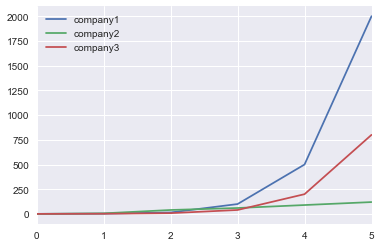

In [56]:
import sys
from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
import pandas as pd #imports Pandas
import numpy as np #imports NumPy
import matplotlib.pyplot as plt #enables plotting
%matplotlib inline
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

i = pd.DataFrame({'company1' : [0.8,3,15,100,500,2000],
                 'company2' : [0.2,6,40,60,90,120],
                 'company3' : [0.5,2,8,40,200,800]})

i.plot(kind='line')
print(i.describe())
print(i.corr())

#Creates dummy variables and shows dummy setitngs
my_categorical_var = ['1Seed','A','B','C','D','E']
my_categorical_var_dummies = pd.get_dummies(my_categorical_var, prefix='Series').iloc[:]
#my_categorical_var_dummies

In [ ]:
# Objective: 
# 	Invest in the best company, based on previous investment data, to predict their valuation growth
#
# Assumptions:
# 	Companies have already been invested in previously
#	They are currently looking for Series B-D investment
#	They have not failed (bankruptcy, dissolution)
#	They are looking for capital in order to grow quickly
#
# Variables:
#	Company name (string)
#	Round type (angel, seed, series A, series B) (string, categorized into ints)
#	Round date (date)
#	Round amount invested (float)
#	Pre-money valuation (float)
# 	Down round (bool)
#	CEO (string)
#	Changed CEO (bool)
#	Investor list (String / List / Series / Dict / DF)
#	Lead investor (String / List / Series)
#	Board members (String / List / Series)
#	Internal investor in round (bool)
#	External investor in round (bool)
#	
#
# Example:
#	[ Tesla,
# 	  Seed Round (0), 
#	  Aug 2006, 
#	  3.4 million, 
#	  10 million, 
#	  False, 
#	  Elon Musk, 
#	  False, 
#	  [DFJ, Musk, ...], 
#	  [DFJ, Musk],
#	  True,
#	  True ]
#
#